In [2]:
import os

import torch
from torch import nn

# Our dataset is a subset of the Food101 dataset


import requests
import zipfile
from pathlib import Path


data_path  = (Path("/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/"))
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi directory exists.


In [3]:
def walk_through_dir(dir_path):
    for  dir_path, dirnames, filesnames in os.walk(dir_path):
        print(f"There  are {len(dirnames)}  directories and {len(filesnames)} images in '{dir_path}'.")

walk_through_dir(image_path)

train_dir = image_path / "train"
test_dir = image_path / "test"

print(train_dir,test_dir)

There  are 2  directories and 1 images in '/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi'.
There  are 3  directories and 0 images in '/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test'.
There  are 0  directories and 19 images in '/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/steak'.
There  are 0  directories and 31 images in '/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/sushi'.
There  are 0  directories and 25 images in '/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza

In [18]:
import random
from PIL import Image

# Set seed
#random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

Random image path: /Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/steak/1882831.jpg
Image class: steak
Image height: 512
Image width: 306


[[[ 91  25   0]
  [ 90  24   0]
  [ 89  23   0]
  ...
  [107  41   6]
  [105  36   3]
  [105  36   3]]

 [[ 92  25   0]
  [ 91  24   0]
  [ 90  23   0]
  ...
  [100  36   0]
  [ 97  31   0]
  [ 97  31   0]]

 [[ 95  23   0]
  [ 95  23   0]
  [ 94  22   0]
  ...
  [ 94  31   0]
  [ 94  29   0]
  [ 94  29   0]]

 ...

 [[182 173 156]
  [182 173 156]
  [183 174 157]
  ...
  [189 179 167]
  [192 180 168]
  [192 180 168]]

 [[182 173 156]
  [182 173 156]
  [183 174 157]
  ...
  [189 179 167]
  [192 180 168]
  [192 180 168]]

 [[182 173 156]
  [182 173 156]
  [183 174 157]
  ...
  [189 179 167]
  [192 180 168]
  [192 180 168]]]


'\n[[[  7  18  38]\n  [  5  16  34]\n  [  2  13  31]\n  ...\n  [ 18   7  11]\n  [ 12   6   8]\n  [  8   4   5]]\n\n [[  2  13  33]\n  [  2  13  31]\n  [  2  13  31]\n  ...\n  [ 18   9  10]\n  [ 17  11  13]\n  [ 16  12  13]]\n\n [[  0  11  31]\n  [  1  12  30]\n  [  3  14  32]\n  ...\n  [ 17   8   9]\n  [ 16  10  12]\n  [ 15  11  12]]\n\n ...\n\n [[226 249 255]\n  [229 253 255]\n  [229 255 254]\n  ...\n  [250 149  95]\n  [240 139  83]\n  [234 130  75]]\n\n [[220 247 254]\n  [224 252 255]\n  [226 255 253]\n  ...\n  [236 133  88]\n  [195  88  42]\n  [170  62  16]]\n\n [[218 247 255]\n  [223 252 255]\n  [224 254 254]\n  ...\n  [255 157 116]\n  [208  99  60]\n  [166  52  15]]]\n'

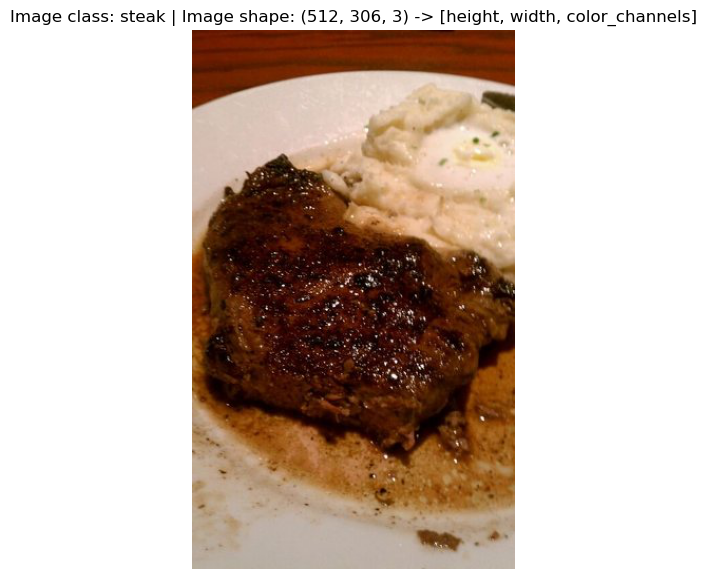

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)


print(img_as_array)
"""
[[[  7  18  38]
  [  5  16  34]
  [  2  13  31]
  ...
  [ 18   7  11]
  [ 12   6   8]
  [  8   4   5]]

 [[  2  13  33]
  [  2  13  31]
  [  2  13  31]
  ...
  [ 18   9  10]
  [ 17  11  13]
  [ 16  12  13]]

 [[  0  11  31]
  [  1  12  30]
  [  3  14  32]
  ...
  [ 17   8   9]
  [ 16  10  12]
  [ 15  11  12]]

 ...

 [[226 249 255]
  [229 253 255]
  [229 255 254]
  ...
  [250 149  95]
  [240 139  83]
  [234 130  75]]

 [[220 247 254]
  [224 252 255]
  [226 255 253]
  ...
  [236 133  88]
  [195  88  42]
  [170  62  16]]

 [[218 247 255]
  [223 252 255]
  [224 254 254]
  ...
  [255 157 116]
  [208  99  60]
  [166  52  15]]]
"""


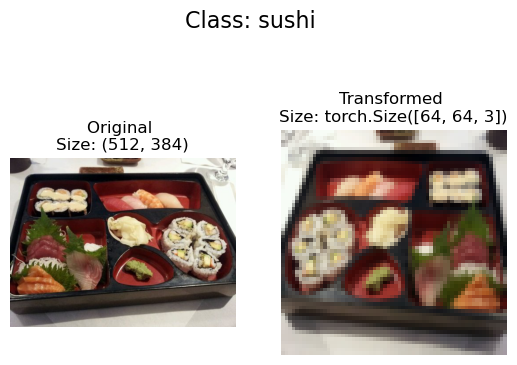

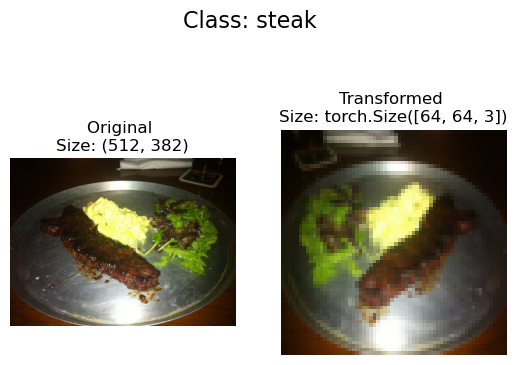

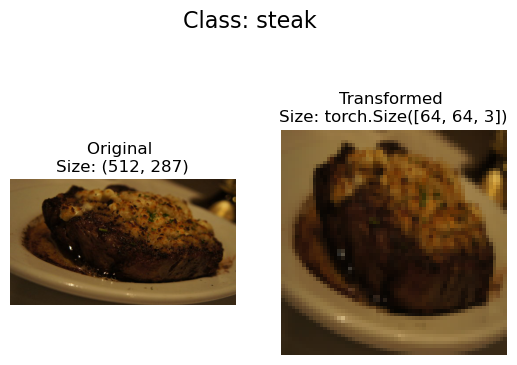

In [24]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


data_transform = transforms.Compose([
        transforms.Resize(size=(64,64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()])

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")


            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3,
                        seed= None)

In [82]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)

print(train_data,"\n",test_data)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: /Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) 
 Dataset ImageFolder
    Number of datapoints: 75
    Root location: /Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [30]:
train_data.classes

['pizza', 'steak', 'sushi']

In [31]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [33]:
len(train_data), len(test_data)

(225, 75)

In [35]:
train_data.samples[0]

('/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train/pizza/1008844.jpg',
 0)

In [52]:
print(train_data[0]) # 3 Feature maps and true result
print(train_data[0][0].__len__()) #Three maps, one for each colour

print(train_data[0][0].shape) #Three maps, one for each colour

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0

In [50]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [51]:
img_permute = img.permute(1,2,0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data,batch_size=1)
test_loader = DataLoader(test_data,batch_size=1)

In [53]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [54]:
import os

In [55]:
train_dir

PosixPath('/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train')

In [57]:
class_names_found = sorted([entry.name for entry in list(os.scandir((train_dir)))])

class_names_found

['pizza', 'steak', 'sushi']

In [58]:
def find_classes(directory :str):
    return sorted([entry.name for entry in list(os.scandir(directory))])

find_classes(train_dir)

['pizza', 'steak', 'sushi']

In [59]:
def find_classes(directory :str):

    classes = sorted([entry.name for entry in list(os.scandir(directory))])

    if not classes:
        raise FileNotFoundError("Could not find")

    class_index = {class_name:i for i,class_name in enumerate(classes)}

    return classes, class_index


find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [67]:
from torch.utils.data import Dataset
from pathlib import Path

class  ImageFolderCustom(Dataset):
    def __init__(self,
                 targ_dir: str,
                 transform=None):

        self.paths = list(Path(targ_dir).glob("*/*.jpg"))

        self.transforms = transform

        self.classes, self.class_to_index = find_classes(targ_dir)

    def laod_image(self,index):

        image_path  = self.paths[index]

        return Image.open(image_path)

    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, index: int):
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [68]:
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [69]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms)

In [71]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x14cd93fb0>,
 <__main__.ImageFolderCustom at 0x14cb83830>)

In [72]:
train_data_custom.class_to_index

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [73]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [75]:
print(train_data_custom.classes,train_data.classes)

['pizza', 'steak', 'sushi'] ['pizza', 'steak', 'sushi']


In [78]:

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: list[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    if seed:
        random.seed(seed)


    random_samples_idx = random.sample(range(len(dataset)), k=n)


    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]


        targ_image_adjust = targ_image.permute(1, 2, 0)


        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

In [79]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

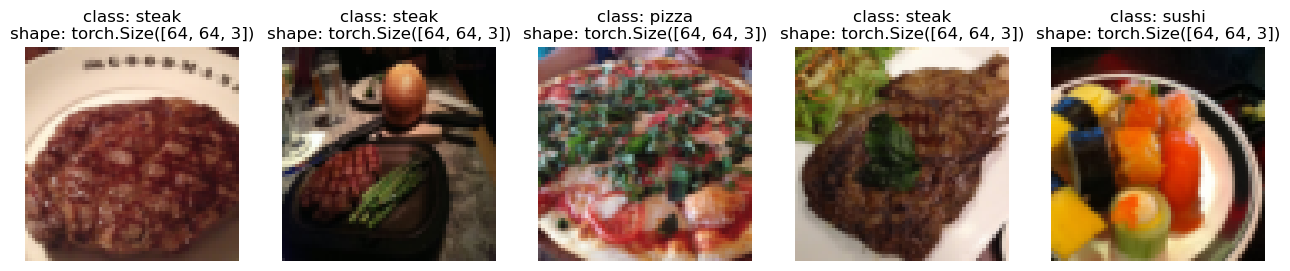

In [81]:
display_random_images(train_data, n= 5, classes=class_names, seed=None)

In [ ]:
train_transform = transforms.Compose([transforms.Resize(size=(224,244)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(224,244)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

In [83]:
image_path

PosixPath('/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi')

In [84]:
train_dir

PosixPath('/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train')

In [92]:
import os

for image_name in os.listdir((train_dir/"steak")):
    print(image_name)

239025.jpg
1598345.jpg
3074367.jpg
2979061.jpg
914570.jpg
167069.jpg
231296.jpg
2324994.jpg
2603058.jpg
1961025.jpg
1615395.jpg
2606444.jpg
355715.jpg
2163079.jpg
1736968.jpg
2878151.jpg
1976160.jpg
1382427.jpg
830007.jpg
256592.jpg
2561199.jpg
3142674.jpg
1966300.jpg
1225762.jpg
2287136.jpg
75537.jpg
461689.jpg
937133.jpg
2881783.jpg
443210.jpg
100135.jpg
735441.jpg
3727491.jpg
214320.jpg
339891.jpg
2129685.jpg
3518960.jpg
176508.jpg
1787505.jpg
3142045.jpg
2222018.jpg
3577618.jpg
2707522.jpg
2017387.jpg
2087958.jpg
2628106.jpg
2614189.jpg
2648423.jpg
2629750.jpg
165639.jpg
1257104.jpg
234626.jpg
1849463.jpg
421476.jpg
2013535.jpg
3245622.jpg
1761285.jpg
2614649.jpg
2880035.jpg
1647351.jpg
97656.jpg
1937872.jpg
922752.jpg
3727036.jpg
2254705.jpg
1624747.jpg
1413972.jpg
1621763.jpg
2825100.jpg
560503.jpg
225990.jpg
1839481.jpg
1264154.jpg
482022.jpg
3857508.jpg


In [91]:
for image_name in os.listdir((train_dir/"pizza")):
    print(image_name)

1033251.jpg
29417.jpg
928670.jpg
1968947.jpg
300869.jpg
2885796.jpg
2291093.jpg
1089334.jpg
3589437.jpg
3505182.jpg
1524655.jpg
1654444.jpg
2569760.jpg
2924941.jpg
2687575.jpg
2382016.jpg
320570.jpg
3196721.jpg
218711.jpg
1649276.jpg
1008844.jpg
1285298.jpg
2121603.jpg
1412034.jpg
2885050.jpg
2576168.jpg
2190018.jpg
2811032.jpg
3530210.jpg
2760984.jpg
3338774.jpg
667309.jpg
3281494.jpg
3699992.jpg
2026009.jpg
764429.jpg
741883.jpg
1633289.jpg
138855.jpg
3441394.jpg
2785084.jpg
5764.jpg
715169.jpg
702165.jpg
2821048.jpg
38349.jpg
2330965.jpg
2800325.jpg
739735.jpg
2228322.jpg
244505.jpg
3109486.jpg
393658.jpg
853441.jpg
2992084.jpg
1660415.jpg
1899785.jpg
3269634.jpg
618348.jpg
1105700.jpg
1044789.jpg
765799.jpg
2154394.jpg
3860002.jpg
3018077.jpg
1572608.jpg
220190.jpg
2493954.jpg
2426686.jpg
786995.jpg
2428085.jpg
3821701.jpg
2702825.jpg
68684.jpg
2451169.jpg
2285942.jpg
12301.jpg
1947572.jpg


In [90]:
for image_name in os.listdir((train_dir)):
    print(image_name)

steak
sushi
pizza


In [93]:
for image_name in os.walk(train_dir):
    print(image_name)

('/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train', ['steak', 'sushi', 'pizza'], [])
('/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train/steak', [], ['239025.jpg', '1598345.jpg', '3074367.jpg', '2979061.jpg', '914570.jpg', '167069.jpg', '231296.jpg', '2324994.jpg', '2603058.jpg', '1961025.jpg', '1615395.jpg', '2606444.jpg', '355715.jpg', '2163079.jpg', '1736968.jpg', '2878151.jpg', '1976160.jpg', '1382427.jpg', '830007.jpg', '256592.jpg', '2561199.jpg', '3142674.jpg', '1966300.jpg', '1225762.jpg', '2287136.jpg', '75537.jpg', '461689.jpg', '937133.jpg', '2881783.jpg', '443210.jpg', '100135.jpg', '735441.jpg', '3727491.jpg', '214320.jpg', '339891.jpg', '2129685.jpg', '3518960.jpg', '176508.jpg', '1787505.jpg', '3142045.jpg', '2222018.jpg', '3577618.jpg', '2707522.jpg', '201

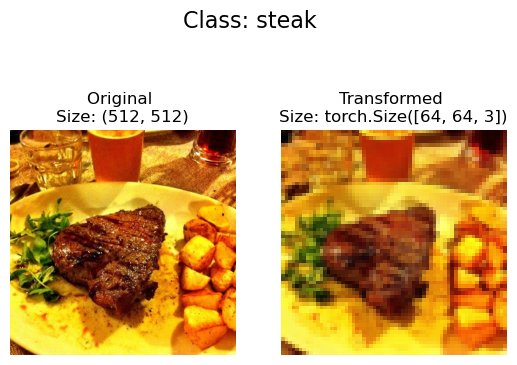

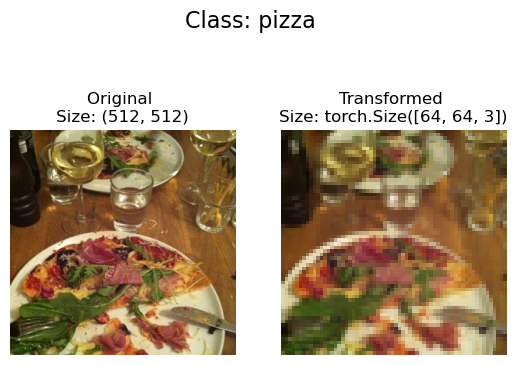

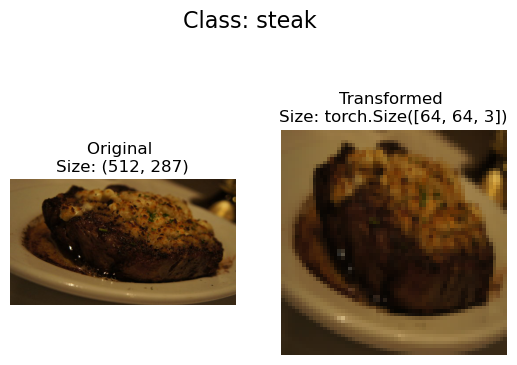

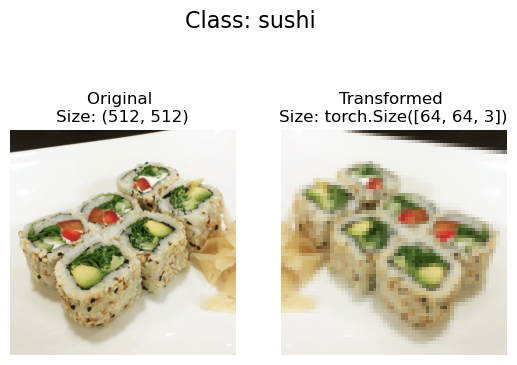

In [117]:
image_path_list = list(image_path.glob("*/*/*.jpg"))


"""image_path_list = []
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith(".jpg"):
            image_path_list.append(os.path.join(root, file))

"""

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=4,
    seed=None
)


In [119]:
simple_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                        transforms.ToTensor()])

In [121]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform = simple_transforms)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform = simple_transforms)

In [122]:
import os
from torch.utils.data import DataLoader

In [123]:
train_dataloader_simple = DataLoader(dataset=train_data_simple,batch_size=32,shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,batch_size=32,shuffle=True)

In [127]:

class VGG(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()

        self.conv_block_one = nn.Sequential(nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
                                            nn.ReLU(),
                                            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
                                            nn.ReLU(),
                                            nn.MaxPool2d(kernel_size=2)
                                            )
        self.conv_block_two = nn.Sequential(nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
                                            nn.ReLU(),
                                            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
                                            nn.ReLU(),
                                            nn.MaxPool2d(kernel_size=2)
                                            )

        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=hidden_units*16*16,out_features=output_shape))

    def forward(self,x):
        x = self.conv_block_one(x)

        x = self.conv_block_two(x)

        x = self.classifier(x)

        return x



In [128]:
model_one = VGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names))

In [130]:
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]

print(img_single,label_single)

tensor([[[[0.7725, 0.7765, 0.7765,  ..., 0.9098, 0.8902, 0.8745],
          [0.7765, 0.7804, 0.7804,  ..., 0.8627, 0.8706, 0.8706],
          [0.7686, 0.7725, 0.7686,  ..., 0.8118, 0.7961, 0.8078],
          ...,
          [0.4118, 0.5333, 0.7333,  ..., 0.9843, 0.9843, 0.9804],
          [0.3843, 0.3725, 0.4078,  ..., 0.9765, 0.9804, 0.9765],
          [0.4078, 0.3882, 0.3725,  ..., 0.9765, 0.9725, 0.9725]],

         [[0.4627, 0.4667, 0.4627,  ..., 0.6275, 0.5961, 0.5725],
          [0.4627, 0.4627, 0.4588,  ..., 0.5686, 0.5686, 0.5647],
          [0.4549, 0.4510, 0.4471,  ..., 0.5059, 0.4941, 0.5020],
          ...,
          [0.1686, 0.3216, 0.5686,  ..., 0.8784, 0.8784, 0.8784],
          [0.1255, 0.1255, 0.1804,  ..., 0.8745, 0.8745, 0.8745],
          [0.1529, 0.1412, 0.1255,  ..., 0.8706, 0.8706, 0.8745]],

         [[0.1765, 0.1765, 0.1765,  ..., 0.3255, 0.3020, 0.2784],
          [0.1804, 0.1804, 0.1843,  ..., 0.2706, 0.2745, 0.2784],
          [0.1804, 0.1882, 0.1843,  ..., 0

In [ ]:
import